# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- Define the problem ----

The goal of this project is to analyze how the job features will affect one's salary. Then, we are going to predict salaries when given a new set of job features.

In [129]:
#import general df lib
import pandas as pd
import numpy as np

#import visiualization lib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import ml lib
##data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
##model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#My info
__author__ = "Binny Tsai"
__email__ = "binny.tsai@gmail.com"

## Part 2 - DISCOVER

### ---- Load  and Examine the data ----

In [2]:
#load the data into a Pandas dataframe
train_features = pd.read_csv('../data/train_features.csv')
train_salaries = pd.read_csv('../data/train_salaries.csv')
test_features = pd.read_csv('../data/test_features.csv')

In [3]:
#examine the data
train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
train_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
#This dataset is used to test the best performing model in the end
test_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [6]:
train_features.info()
train_features.describe(include ='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000
unique,1000000,63,8,5,9,7,NaN,NaN
top,JOB1362684965181,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN
freq,1,16193,125886,236976,532355,143206,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.992386,49.529260
std,NaN,NaN,NaN,NaN,NaN,NaN,7.212391,28.877733
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,25.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,50.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,75.000000


In [7]:
train_salaries.info()
train_salaries.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
jobId     1000000 non-null object
salary    1000000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


,jobId,salary
count,1000000,1000000.000000
unique,1000000,NaN
top,JOB1362684965181,NaN
freq,1,NaN
mean,NaN,116.061818
std,NaN,38.717936
min,NaN,0.000000
25%,NaN,88.000000
50%,NaN,114.000000
75%,NaN,141.000000


We observe that the minimum vales for salary contain 0 which don't quite make sense so we should investigate those datas. Next, we need to clean the data such as duplicate rows, missing values, and corrupt data.

### ---- 3 Clean the data ----

In [8]:
#Check for duplicate data
train_features.duplicated().sum()

0

In [9]:
train_salaries.duplicated().sum()

0

In [10]:
#Check for missing values
train_features.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [11]:
train_salaries.isnull().sum()

jobId     0
salary    0
dtype: int64

In [12]:
#merge the trainning sets
train_merge = pd.merge(train_features, train_salaries, how = 'left', on= 'jobId')

In [13]:
train_merge.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [14]:
#check for salary=0
train_merge[train_merge['salary']==0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [15]:
#We want to drop the above rows since these jobs are unlikely to be unpaid
train_merge = train_merge[train_merge.salary!=0]

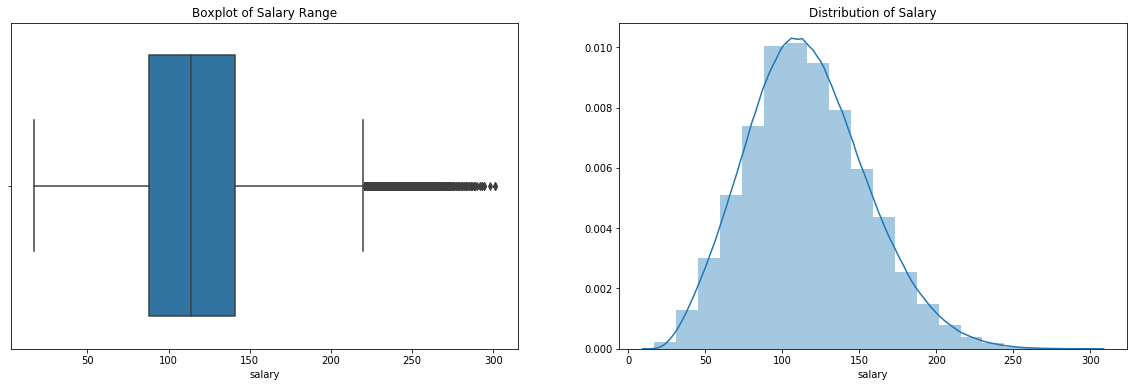

In [16]:
#check for outliers and distribution of salary
fig = plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.boxplot(train_merge['salary'])
plt.title('Boxplot of Salary Range')
plt.xlabel('salary')

plt.subplot(1,2,2)
sns.distplot(train_merge['salary'],bins=20)
plt.title('Distribution of Salary')
plt.show()

In [17]:
#identify outliers
IQR = train_merge.salary.describe()['75%'] - train_merge.salary.describe()['25%']
train_merge.salary.describe()[6]+1.5*IQR

220.5

In [18]:
outliers = train_merge[train_merge.salary >= 220.5]
pd.pivot_table(outliers,values=['salary','yearsExperience'], index = ['jobType','industry'], aggfunc = np.mean)

salary  yearsExperience
jobType        industry                              
CEO            AUTO       232.228261        21.065217
               EDUCATION  228.312500        21.737500
               FINANCE    237.408342        19.061471
               HEALTH     233.148936        20.088146
               OIL        237.454724        18.852362
               SERVICE    230.669565        21.608696
               WEB        235.834459        19.630068
CFO            AUTO       230.142857        21.585714
               EDUCATION  226.866667        22.800000
               FINANCE    234.465587        19.937247
               HEALTH     230.829457        21.162791
               OIL        235.076763        20.066390
               SERVICE    228.000000        22.066667
               WEB        234.126437        20.478927
CTO            AUTO       229.622642        21.735849
               EDUCATION  225.941176        22.411765
               FINANCE    234.322034        19.802966
               HEALTH     232.160000        21.704000
               OIL        235.222656        19.599609
               SERVICE    228.970588        21.588235
               WEB        233.370909        20.330909
JUNIOR         FINANCE    229.000000        21.875000
               OIL        227.090909        23.272727
               WEB        226.000000        24.000000
MANAGER        AUTO       224.333333        22.666667
               FINANCE    232.868421        21.368421
               HEALTH     227.875000        22.875000
               OIL        231.360000        21.230000
               WEB        230.666667        21.266667
SENIOR         AUTO       221.000000        24.000000
               FINANCE    229.655172        22.206897
               HEALTH     223.000000        22.000000
               OIL        229.407407        22.222222
               WEB        228.625000        22.375000
VICE_PRESIDENT AUTO       228.214286        22.428571
               EDUCATION  226.000000        22.000000
               FINANCE    232.338095        20.209524
               HEALTH     231.051282        21.410256
               OIL        233.781818        20.995455
               SERVICE    228.333333        23.166667
               WEB        230.681416        21.194690

In [19]:
outliers['jobType'].value_counts().sort_values(ascending=False)

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [20]:
outliers[outliers.jobType=='JUNIOR']

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


### Summary of Data Cleanning:

- There are no duplicate data.
- There are no miss values.
- We dropped 5 rows with salary equals to 0 because these datas might be incorrectly recorded. 
- We noticed that most upper outliers are executives and senior levels which makes sense that their salaries are high. We decided not to drop them. 
- The upper outliers who are junior levels are mostly in finance and oil industries with many years of experience. They also held masters or doctoral degrees, major in business or engineer. Therefore, they are expected to have high salary.

### ---- 4 Explore the data (EDA) ----

In [21]:
#Look the summary of cleaned dataset
train_merge.describe(include='all')

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
count,999995,999995,999995,999995,999995,999995,999995.000000,999995.000000,999995.000000
unique,999995,63,8,5,9,7,NaN,NaN,NaN
top,JOB1362684965181,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN,NaN
freq,1,16193,125886,236975,532353,143205,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.992407,49.529381,116.062398
std,NaN,NaN,NaN,NaN,NaN,NaN,7.212390,28.877721,38.717163
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,17.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,25.000000,88.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,50.000000,114.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,75.000000,141.000000


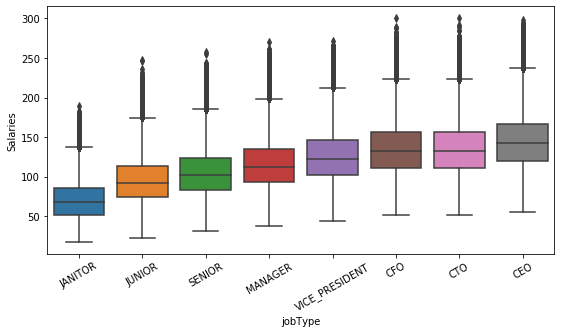

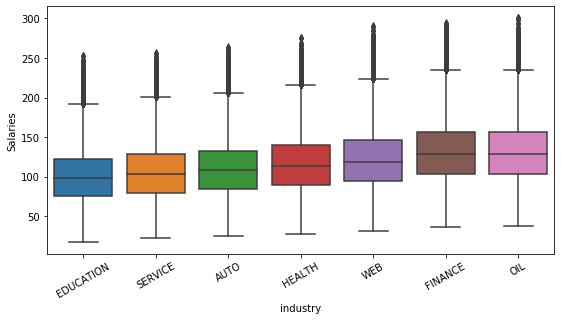

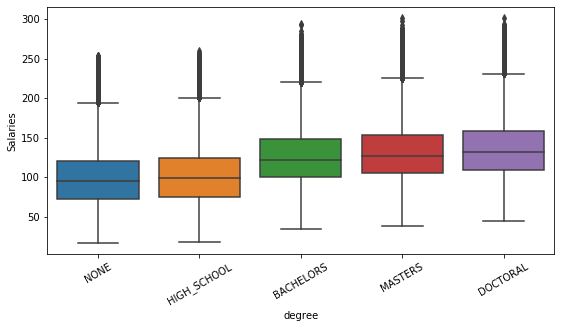

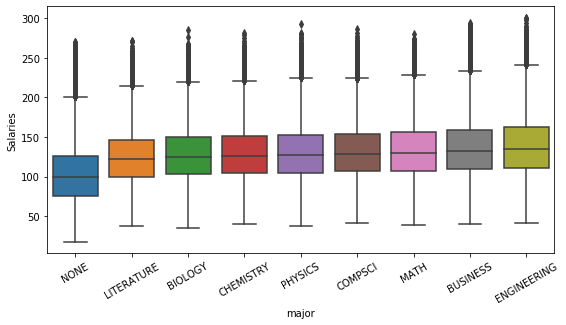

In [22]:
#summarize each categorical feature variable
cols=['jobType','industry','degree','major']
for i in range(4):
    fig= plt.figure(figsize=(20,10))
    ax = fig.add_subplot(2,2,i+1)
    rank = train_merge.groupby(cols[i]).mean()['salary'].sort_values().index
    sns.boxplot(x=cols[i], y='salary',data=train_merge,order=rank)
    plt.xticks(rotation=30)
    plt.ylabel('Salaries')
    plt.show()

### Comment:
- job type vs salaries : There exists a positive correlation. People in excutive positions tend to have higher pay.
- industry vs salaries : There exists a weak positive correlation. Web, finance and oil industries tend to pay better.
- degree vs salaries: People who obtain higher degree tend to have higher pay.
- major vs salaries: People in STEM majors tend to receive higher salary.

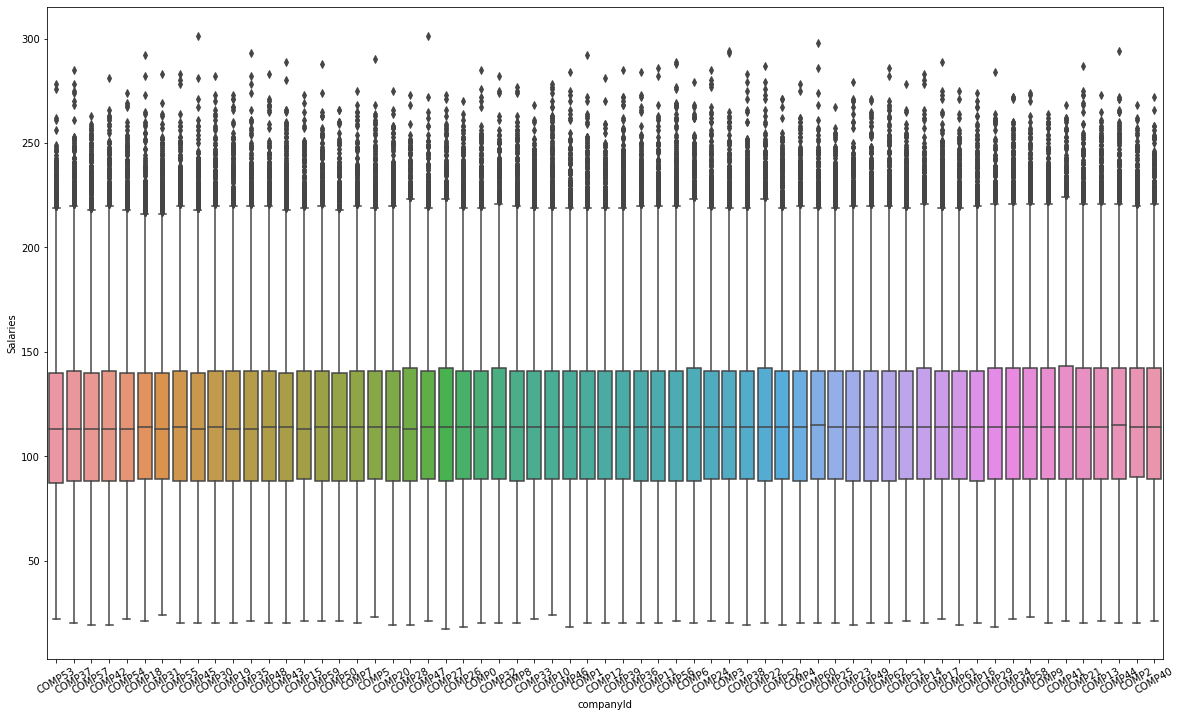

In [23]:
fig= plt.figure(figsize=(20,12))
rank = train_merge.groupby('companyId').mean()['salary'].sort_values().index
sns.boxplot(x='companyId', y='salary',data=train_merge, order = rank)
plt.xticks(rotation=30)
plt.ylabel('Salaries')
plt.show()

### Comment:
We noticed that the mean salary for each company does not change too much. There is no correlation between company and salaries. 

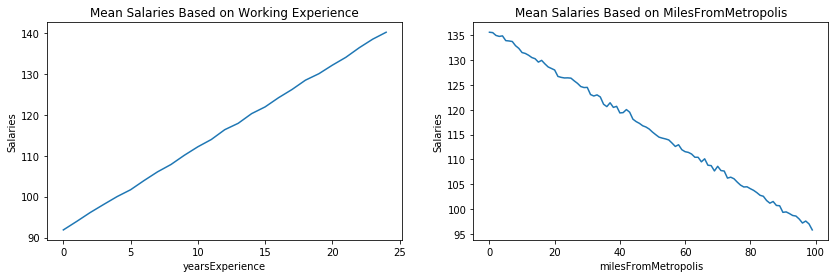

In [24]:
#check relationship for numeric features
num_cols=['yearsExperience','milesFromMetropolis']
fig = plt.figure(figsize=(14,4))
titles=['Mean Salaries Based on Working Experience','Mean Salaries Based on MilesFromMetropolis']
for i in range(2):
    plt.subplot(1,2,i+1)
    mean_salary=train_merge.groupby(num_cols[i]).mean()['salary']
    plt.plot(mean_salary)
    plt.ylabel('Salaries')
    plt.title(titles[i])
    plt.xlabel(num_cols[i])

### Comment 
- There is a clear **positive correlation** between years of experience and salaries. As people has more experiences, their salaries increase.
- There is a **negative correlation** between miles from metropolis. Salaries decreases as distance from metropolis increases.

In [35]:
# Summarize the correlations
def encode_label(df, col):
    #for each categorical columns, replace label with mean salary
    cat_dict ={}
    cats = df[col].unique()
    for cat in cats:
        cat_dict[cat] = df[df[col] == cat]['salary'].mean()
    if df[col].dtype == 'O':
        df[col]=df[col].map(cat_dict)

In [54]:
train_encode = train_merge.copy()
cat_features=['companyId','jobType','degree','major','industry']
for col in train_encode.columns:
    for each in cat_features:
        if train_encode[col].name==each:
            encode_label(train_encode, col)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text xticklabel objects>)

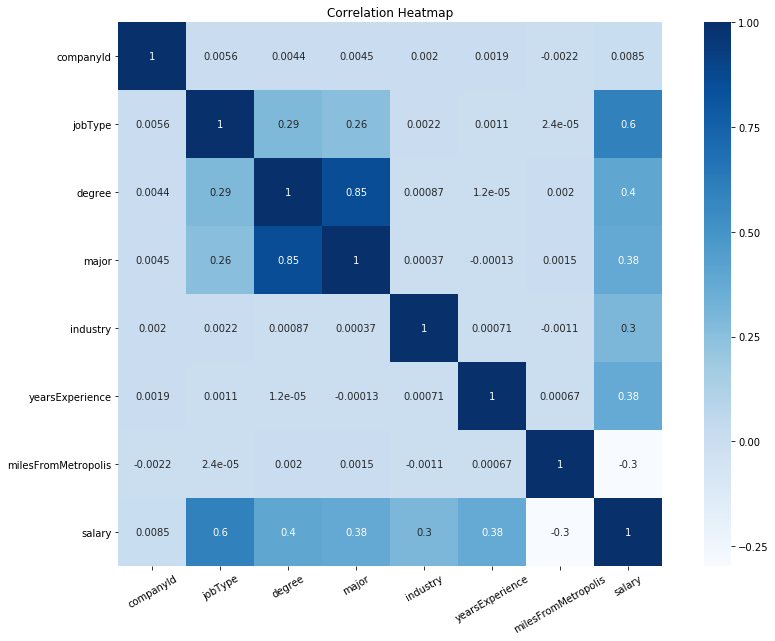

In [66]:
corr = train_encode.iloc[:,1:].corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(corr,square = True,annot=True,cmap='Blues')
plt.title('Correlation Heatmap')
plt.xticks(rotation = 30)

## Comment:
As we see that companyId doesn't really correlate to salary, we will exclude this feature from our model.

### ---- 5 Establish a baseline ----

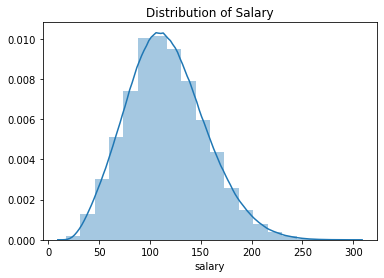

In [71]:
sns.distplot(train_merge['salary'],hist=True, bins=20)
plt.title("Distribution of Salary")
plt.show()

Our target value(salary) looks like normally distributed. Also, we discovered that the job features are correlated with salary. Therefore, we will choose **MSE as a reasonable metric**. 

In [150]:
#Data Preparation
cat_features=['jobType','degree','major','industry']
num_features=['yearsExperience','milesFromMetropolis']

train_features=pd.get_dummies(train_merge[cat_features])
train_features=pd.concat([train_features,train_merge[num_features]],axis=1)
train_target=train_merge['salary']

#split data into trainning set and test set
features_train, features_test, target_train, target_test = train_test_split(train_features,train_target,test_size=0.2, random_state =20)


In [87]:
#Create baseline model - Multiple Linear Regression
lm = LinearRegression()
lm.fit(features_train,target_train)
#prediction
target_pred = lm.predict(features_test)
target_pred

array([127.24130249,  91.59796143, 127.06608582, ..., 125.22706604,
       100.01301575, 118.70082092])

In [94]:
report = sm.OLS(target_train, features_train).fit()
print(report.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                 8.584e+04
Date:                Mon, 19 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:11:45   Log-Likelihood:            -3.5160e+06
No. Observations:              799996   AIC:                         7.032e+06
Df Residuals:                  799968   BIC:                         7.032e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
jobType_CEO               52

In [97]:
mse=mean_squared_error(target_test, target_pred)
print("MSE:", mse)

MSE: 383.3902950514568


### ---- 6 Hypothesize solution ----

From the multiple linear regression method, the result gives **MSE of 383.39**.
We want to imrove the result to be <360.
We are going to try **Random Forest** and **Gradient Boosting** models.

## Part 3 - DEVELOP

### ----  7 Create models ----

In [109]:
#Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=20,n_jobs = -1,oob_score=True, random_state=30,max_depth=10,)
rf_model.fit(features_train,target_train)

target_pred1=rf_model.predict(features_test)
target_pred1

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


array([148.06903528,  88.97738   , 118.05619515, ..., 141.00487409,
       104.15749322, 126.04108481])

In [110]:
mse=mean_squared_error(target_test, target_pred1)
print("MSE:", mse)

MSE: 470.2783199691347


### Tunning Hyperparameters for Random Forest Model

In [121]:
# Tunning max_depth option
oob_scores=[]
max_depth =[1,5,15,20,25,30,35,40]
mses=[]

for depth in max_depth:
    model = RandomForestRegressor(max_depth=depth,n_jobs=-1,oob_score=True,random_state=30)
    model.fit(features_train,target_train)
    print(depth,"Depth")
    oob = model.oob_score_
    print("The oob score is:",str(oob))
    oob_scores.append(oob)
    target_pred = model.predict(features_test)
    mse = mean_squared_error(target_test, target_pred)
    mses.append(mse)
    print("MSE:",mse)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1 Depth
The oob score is: 0.09997056974028506
MSE: 1204.4872212685991


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


5 Depth
The oob score is: 0.42323694183100247
MSE: 715.9895082921379


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


15 Depth
The oob score is: 0.6359099504580252
MSE: 386.7029035524942


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


20 Depth
The oob score is: 0.618714445887327
MSE: 394.5299635915272


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


25 Depth
The oob score is: 0.5712160383453107
MSE: 440.25211360825614


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


30 Depth
The oob score is: 0.5488353550814926
MSE: 464.25095573111275


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


35 Depth
The oob score is: 0.5463812174917251
MSE: 466.4060232877009


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


40 Depth
The oob score is: 0.5463683635398505
MSE: 466.75808436882085


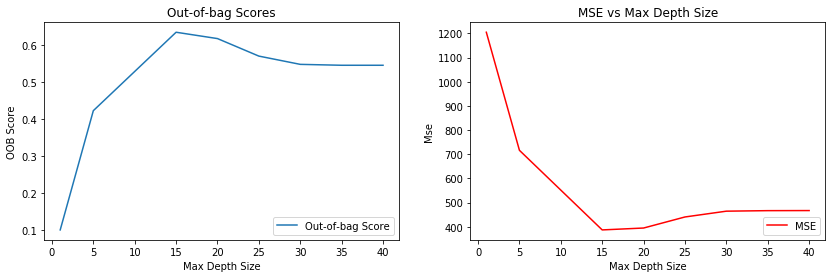

In [122]:
fig = plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(max_depth, oob_scores, label='Out-of-bag Score')
plt.xlabel('Max Depth Size')
plt.ylabel('OOB Score')
plt.title('Out-of-bag Scores')
plt.legend(loc="lower right")

plt.subplot(1,2,2)
plt.plot(max_depth, mses, label='MSE',color='red')
plt.xlabel('Max Depth Size')
plt.ylabel('Mse')
plt.title('MSE vs Max Depth Size')
plt.legend(loc="lower right")
plt.show()

In [126]:
#Tunning number of trees
oob_scores=[]
trees=[1,3,5,15,25,35,50] 
mses=[]

for tree in trees:
    model = RandomForestRegressor(n_estimators=tree,n_jobs=-1,oob_score=True,random_state=30)
    model.fit(features_train,target_train)
    print(tree,"Trees")
    oob = model.oob_score_
    print("The oob score is:",str(oob))
    oob_scores.append(oob)
    target_pred = model.predict(features_test)
    mse = mean_squared_error(target_test, target_pred)
    mses.append(mse)
    print("MSE:",mse)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


1 Trees
The oob score is: -5.4893890059097705
MSE: 714.704875852886


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


3 Trees
The oob score is: -1.848339436112087
MSE: 530.6603430671473


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


5 Trees
The oob score is: -0.37002871171220564
MSE: 493.920163903157


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


15 Trees
The oob score is: 0.6582104213104281
MSE: 457.99981795194526


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


25 Trees
The oob score is: 0.6849098279071797
MSE: 451.4462076858556


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


35 Trees
The oob score is: 0.6917452120469287
MSE: 448.09365483113834
50 Trees
The oob score is: 0.6962900744785172
MSE: 445.3999866310484


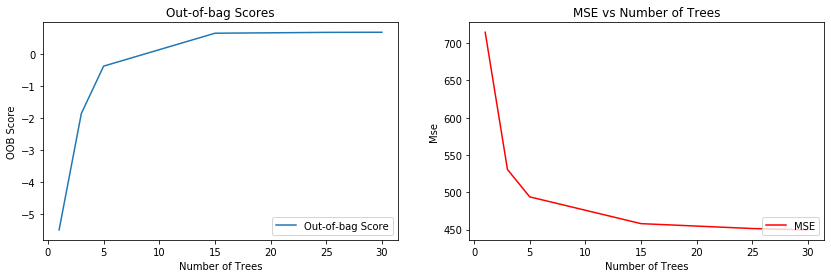

In [125]:
fig = plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(trees, oob_scores, label='Out-of-bag Score')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Score')
plt.title('Out-of-bag Scores')
plt.legend(loc="lower right")

plt.subplot(1,2,2)
plt.plot(trees, mses, label='MSE',color='red')
plt.xlabel('Number of Trees')
plt.ylabel('Mse')
plt.title('MSE vs Number of Trees')
plt.legend(loc="lower right")
plt.show()

In [127]:
#Tunning min_samples_leaf
oob_scores=[]
leaves=[1,3,5,7,10,20]
mses=[]

for leaf in leaves:
    model = RandomForestRegressor(min_samples_leaf=leaf,n_jobs=-1,oob_score=True,random_state=30)
    model.fit(features_train,target_train)
    print(leaf,"Leaves")
    oob = model.oob_score_
    print("The oob score is:",str(oob))
    oob_scores.append(oob)
    target_pred = model.predict(features_test)
    mse = mean_squared_error(target_test, target_pred)
    mses.append(mse)
    print("MSE:",mse)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


1 Leaves
The oob score is: 0.5463615499923781
MSE: 466.83158043565055


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


3 Leaves
The oob score is: 0.6046476336023883
MSE: 408.79825485944224


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


5 Leaves
The oob score is: 0.622766863397499
MSE: 391.1499203566854


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


7 Leaves
The oob score is: 0.631647444385143
MSE: 382.8797583289156


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


10 Leaves
The oob score is: 0.6384382369887134
MSE: 376.3490802527886


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


20 Leaves
The oob score is: 0.6463038956875513
MSE: 370.290700032453


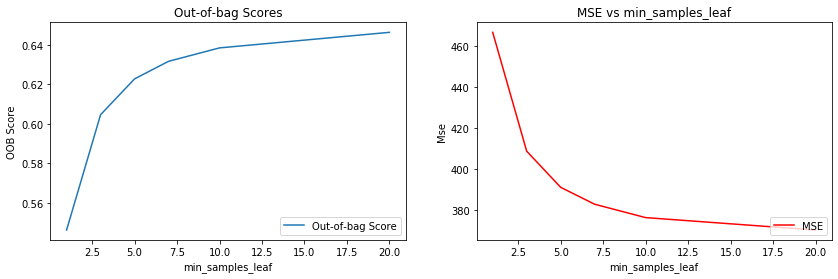

In [128]:
fig = plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(leaves, oob_scores, label='Out-of-bag Score')
plt.xlabel('min_samples_leaf')
plt.ylabel('OOB Score')
plt.title('Out-of-bag Scores')
plt.legend(loc="lower right")

plt.subplot(1,2,2)
plt.plot(leaves, mses, label='MSE',color='red')
plt.xlabel('min_samples_leaf')
plt.ylabel('Mse')
plt.title('MSE vs min_samples_leaf')
plt.legend(loc="lower right")
plt.show()

In [133]:
param_grid = {"max_depth": [8,9,10,11],
              "min_samples_leaf" : [20,25,30],
              "n_estimators": [15,20,25]}

model = RandomForestRegressor()
gs_cv = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=10, n_jobs=-1).fit(features_train, target_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 104 out of 108 | elapsed: 13.1min remaining:   30.2s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 13.4min finished


In [134]:
rf_best = gs_cv.best_estimator_
rf_best

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=25, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=25,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### Tune Gradient Boosting Method

In [161]:
#Gradient Descent
results=[]

for depth in [1,2,4,5]:
    gd_model = GradientBoostingRegressor(max_depth = depth,random_state=30)
    gd_model.fit(features_train,target_train)
    results.append({'max_depth':depth,'MSE':mean_squared_error(target_train,gd_model.predict(features_train))})

max_depth_lr = pd.DataFrame(results).set_index('max_depth').sort_index()
max_depth_lr

,MSE
max_depth,
1,576.087099
2,413.065563
4,363.124044
5,358.225339


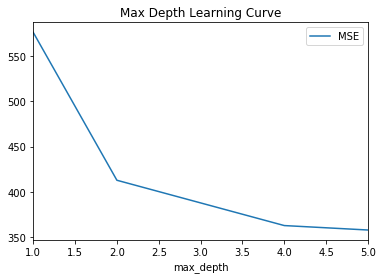

In [162]:
max_depth_lr.plot(title='Max Depth Learning Curve')
plt.show()

In [164]:
# Tune Learnning Rate
results=[]

for rate in [0.1,0.15,0.2,0.3]:
    gd_model = GradientBoostingRegressor(learning_rate=rate)
    gd_model.fit(features_train,target_train)
    results.append({'learning_rate':rate,'MSE':mean_squared_error(target_train,gd_model.predict(features_train))})

learning_rate_lr = pd.DataFrame(results).set_index('learning_rate').sort_index()
learning_rate_lr

,MSE
learning_rate,
0.10,374.792152
0.15,363.355382
0.20,361.119525
0.30,361.055712


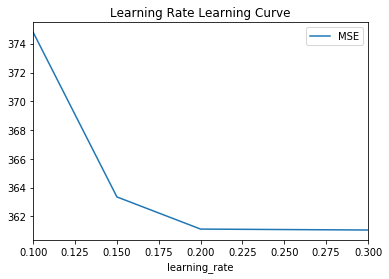

In [165]:
learning_rate_lr.plot(title="Learning Rate Learning Curve")
plt.show()

### ---- 8 Test models (Cross Validation)----

In [169]:
def train_model(model, x_train, y_train, cv_folds, mean_mse, cv_std):
    neg_mse = cross_val_score(model, x_train, y_train, 
                              cv = cv_folds, n_jobs = -1, scoring='neg_mean_squared_error')
    mean_mse[model] = -1.0*np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)
    
def print_summary(model, mean_mse, cv_std):
    print('\nModel:\n', model)
    print('Average MSE:\n', mean_mse[model])
    print('Standard deviation during CV:\n', cv_std[model])

In [170]:
#initiate containers
models=[]
mean_mse={}
cv_std={}

In [172]:
#Let's do a 5-fold cross validation on models and measure MSE
lr = LinearRegression()
rf_updated = RandomForestRegressor(n_estimators=25, max_depth=11, max_features='auto',
                                 min_samples_leaf=30, min_samples_split=2)

gb_updated= GradientBoostingRegressor(alpha=0.9, learning_rate=0.2, max_depth=5, 
                                      max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150)

#add models to list
models.extend([lr, rf_updated, gb_updated])

#train models
cv_folds = 5
for model in models:
    train_model(model,features_train, target_train, cv_folds, mean_mse, cv_std)
    print_summary(model, mean_mse, cv_std)


Model:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Average MSE:
 384.68062984119877
Standard deviation during CV:
 1.1784870542431336

Model:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=30, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=25,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
Average MSE:
 442.0248949965762
Standard deviation during CV:
 1.6792248958987819

Model:
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.2, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_

### ---- 9 Select best model  ----

In [197]:
#choose model with lowest mse
model = min(mean_mse, key=mean_mse.get)
print('\nPredictions calculated using model with lowest MSE:\n',model)

#train model on entire dataset
model.fit(train_features, train_target)

#create predictions based on test data
predictions = model.predict(features_test)


Predictions calculated using model with lowest MSE:
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.2, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


**The best model under cross validation with MSE: 357.4293905655165**

### ---- 10 Feature Importance ----

In [212]:
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
else:
    #linear models don't have feature_importances_
    importances = 0
    
feature_importances = pd.DataFrame({'feature':features_train.columns, 'importance':importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
#set index to 'feature'
feature_importances.set_index('feature', inplace=True, drop=True)
feature_importances.head(15)

,importance
feature,
jobType_JANITOR,0.226588
yearsExperience,0.186830
milesFromMetropolis,0.130539
major_NONE,0.076591
jobType_JUNIOR,0.076485
jobType_CEO,0.051394
jobType_SENIOR,0.038800
industry_EDUCATION,0.029570
industry_OIL,0.027219


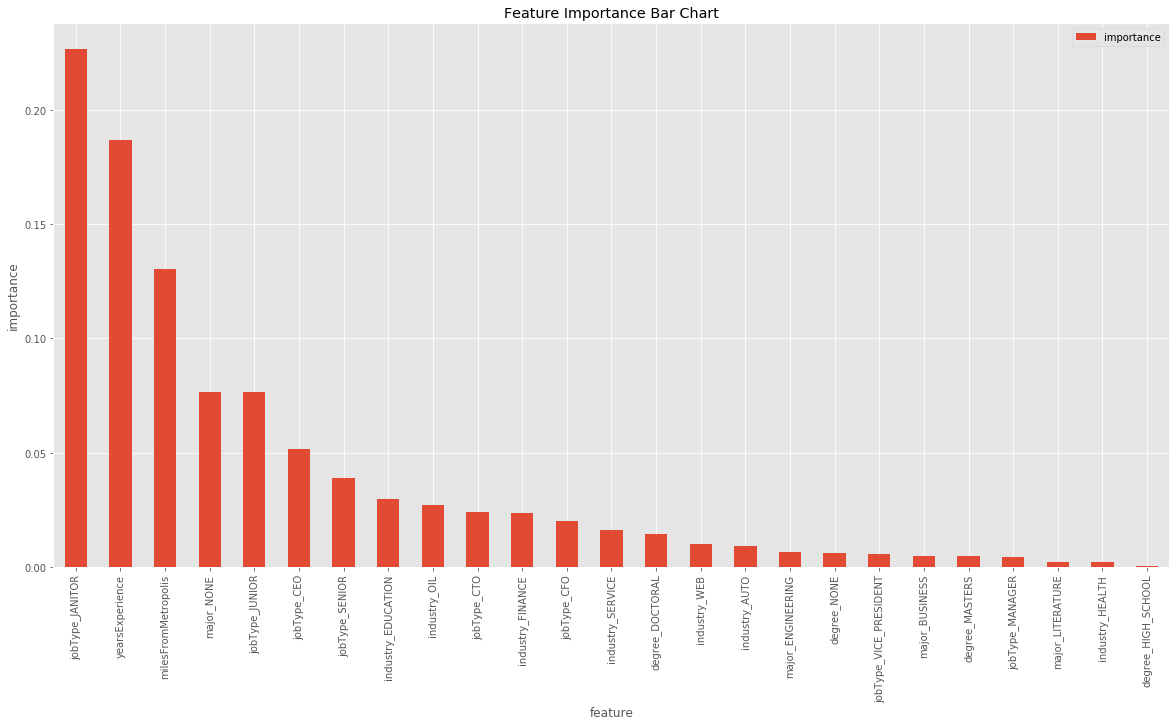

In [217]:
plt.style.use('ggplot')
feature_importances[0:25].plot.bar(figsize=(20,10))
plt.title("Feature Importance Bar Chart")
plt.ylabel('importance')
plt.show()